# Lab 7 and 8

#### Joseph Bu

## Lab 7

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random
import pickle

plt.rcParams["figure.figsize"] = (20,15)

infile = open("higgs_100000_pt_250_500.pkl", 'rb')
higgs_data = pickle.load(infile)

infile2 = open("qcd_100000_pt_250_500.pkl", 'rb')
qcd_data = pickle.load(infile2)

In [2]:
higgs_df = pd.DataFrame(higgs_data)
higgs_df.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

qcd_df = pd.DataFrame(qcd_data)
qcd_df.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'] 

### 1. Make a stacked histogram plot for the feature variable: mass

+ Evaluate expected significance without any event selection.
  + Use Poisson statistics for significance calculation
  + Compare the exact significance to the approximation  $N_{Higgs}/(\sqrt{N_{QCD}})$ . If they are equivalent, explain your findings.

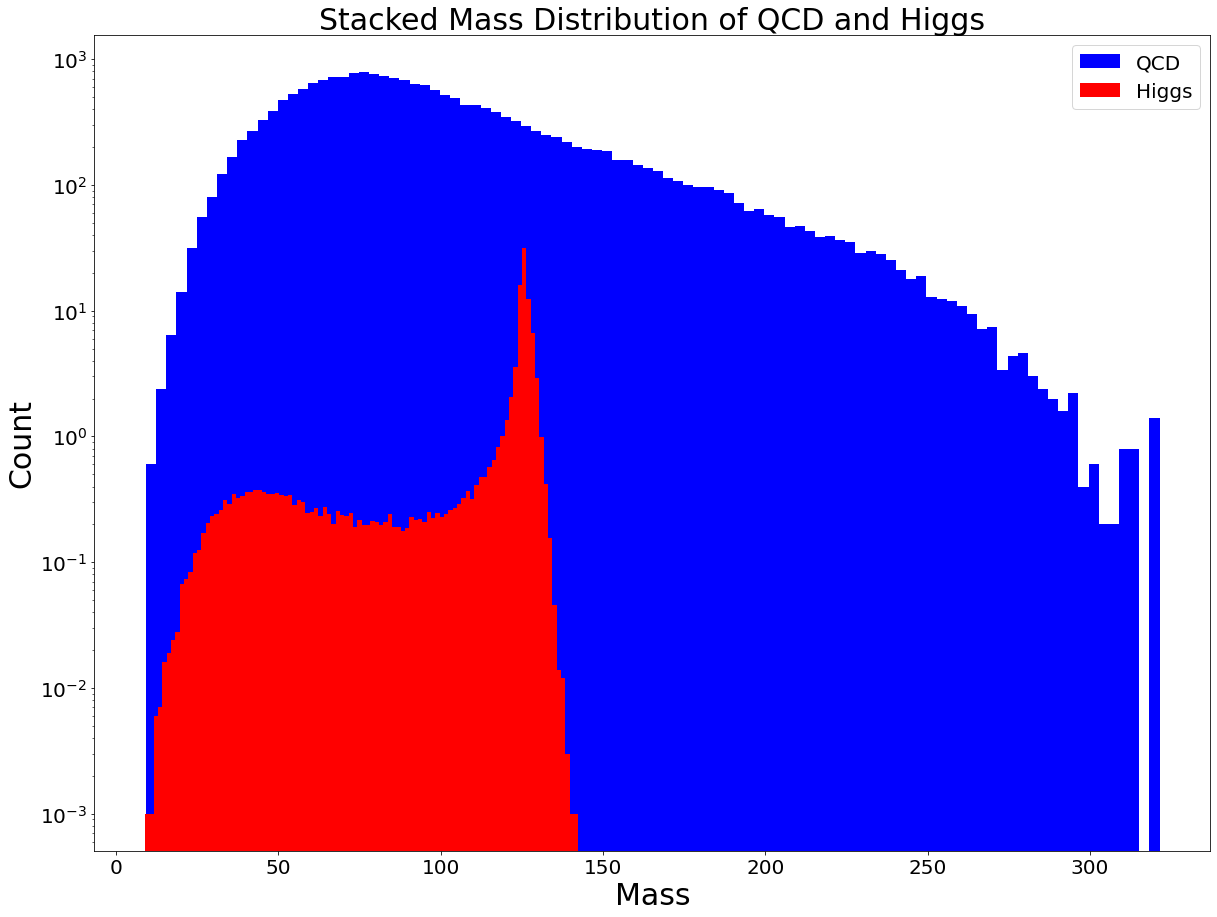

In [106]:
plt.hist(qcd_df['mass'], bins=100, label = 'QCD', stacked=True, color='blue', weights=np.repeat(20000/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['mass'], bins=100, label = 'Higgs', stacked=True, color='red', weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Stacked Mass Distribution of QCD and Higgs', fontsize=30)
plt.legend(fontsize=20)
plt.show()

In [4]:
mu_bkgd = 20000
mu_signal = 100

In [5]:
prob = stats.poisson.cdf(mu_bkgd + mu_signal, mu=mu_bkgd, loc=0)
ex_sig = stats.norm.ppf(prob, loc=0, scale=1)
print("Expected Significance:",ex_sig)


Expected Significance: 0.7112259282313185


In [6]:
n_higgs = (sum(higgs_df['mass']) / sum(higgs_df['mass']))*100
n_qcd_sqrt = ((sum(qcd_df['mass'])/sum(qcd_df['mass']))*20000)**(0.5)
print("N_Higgs: ", n_higgs)
print("(√N_QCD): ", n_qcd_sqrt)
print("ratio: ", n_higgs/n_qcd_sqrt)

N_Higgs:  100.0
(√N_QCD):  141.4213562373095
ratio:  0.7071067811865475


So as we can see our _Expected Significance_ = 0.711 while our approximation of $N_{Higgs}/(\sqrt{N_{QCD}})$ = 0.707. They are essentially equivalent which shows that this a good approximation of the significance for the signal in the Poisson distribution.

### 2. Identify mass cuts to optimize the expected significance.

+ Try different mass cuts systematically
  + Evaluate expected significance for each set of mass cuts
  + Identify the set of mass cuts which give you the highest significance.

In [7]:
mu = np.mean(higgs_df['mass'])
mu

114.89238664552165

In [118]:
bottom1 = mu - 10
upper1 = mu + 10

bkgd_mask1 = (qcd_df['mass'] >= bottom1) & (qcd_df['mass'] <= upper1)
cut_mask1 = (higgs_df['mass'] >= bottom1) & (higgs_df['mass'] <= upper1)

bkgd1 = qcd_df[bkgd_mask1]['mass']
cut1 = higgs_df[cut_mask1]['mass']

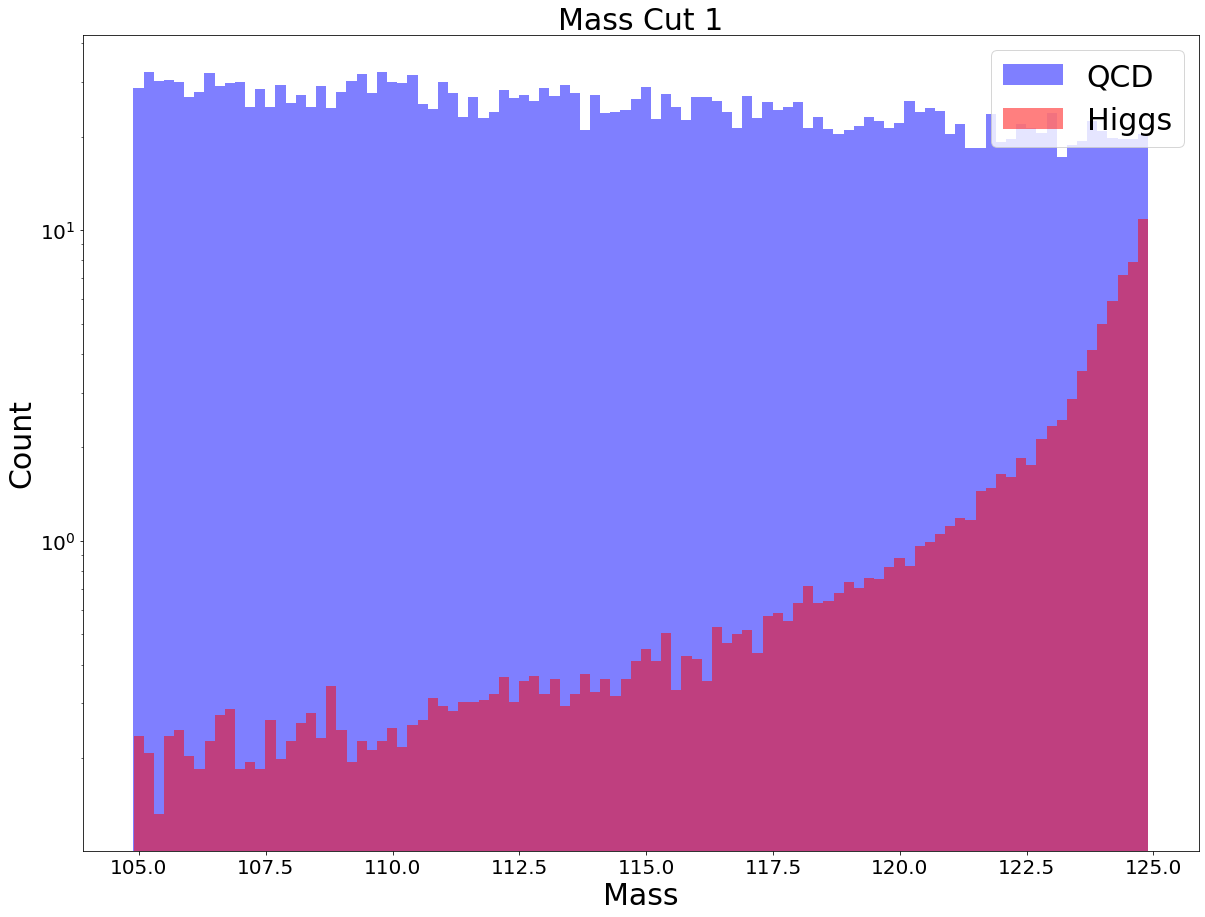

Expected Significance: 1.9816154300925315


In [119]:
n1, temp1, temp2 = plt.hist(bkgd1, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd1)))
plt.hist(cut1 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(cut1), len(cut1)))
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut 1', fontsize=30)
plt.legend(fontsize=30)
plt.show()

#n_higgs_mc1 = (sum(cut1) / sum(higgs_df['mass']))*100
#print(n_higgs_mc1)
#n_qcd_sqrt_mc1 = ((sum(bkgd1) / sum(qcd_df['mass']))*20000)**(0.5)
#print(n_qcd_sqrt_mc1)
#print("ratio: ", n_higgs_mc1/n_qcd_sqrt_mc1)

bkgd_cut1 = np.sum(n1)

prob_cut1 = stats.poisson.cdf(bkgd_cut1 + mu_signal, mu=bkgd_cut1, loc=0)
ex_sig_cut1 = stats.norm.ppf(prob_cut1, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut1)

In [121]:
bottom2 = mu - 5
upper2 = mu + 5

bkgd_mask2 = (qcd_df['mass'] >= bottom2) & (qcd_df['mass'] <= upper2)
cut_mask2 = (higgs_df['mass'] >= bottom2) & (higgs_df['mass'] <= upper2)

bkgd2 = qcd_df[bkgd_mask2]['mass']
cut2 = higgs_df[cut_mask2]['mass']

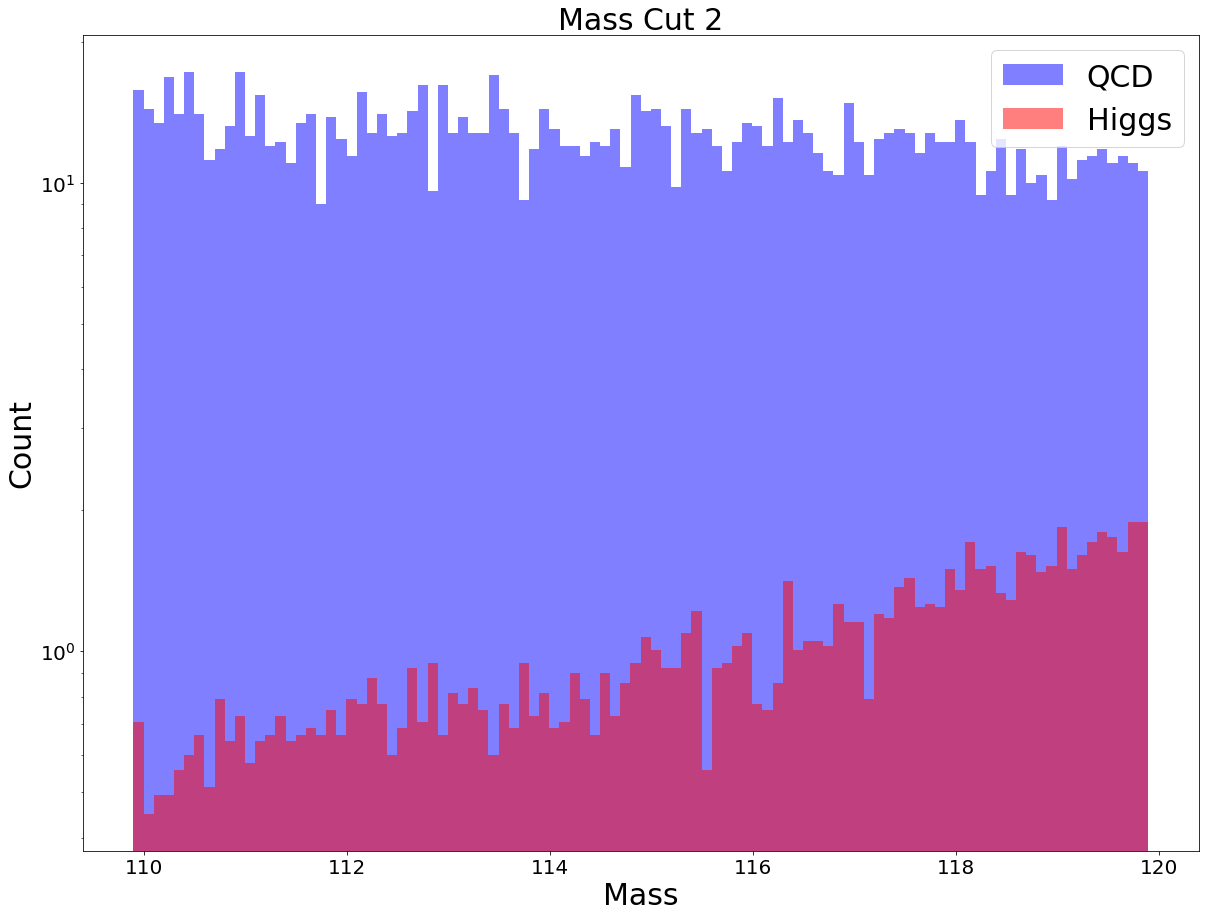

Expected Significance: 2.791596274316958


In [122]:
n2, temp1, temp2 = plt.hist(bkgd2, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd2)))
plt.hist(cut2 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(cut2), len(cut2)))
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut 2', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut2 = np.sum(n2)

prob_cut2 = stats.poisson.cdf(bkgd_cut2 + mu_signal, mu=bkgd_cut2, loc=0)
ex_sig_cut2 = stats.norm.ppf(prob_cut2, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut2)

In [123]:
bottom3 = 120
upper3 = 130

bkgd_mask3 = (qcd_df['mass'] >= bottom3) & (qcd_df['mass'] <= upper3)
cut_mask3 = (higgs_df['mass'] >= bottom3) & (higgs_df['mass'] <= upper3)

bkgd3 = qcd_df[bkgd_mask3]['mass']
cut3 = higgs_df[cut_mask3]['mass']

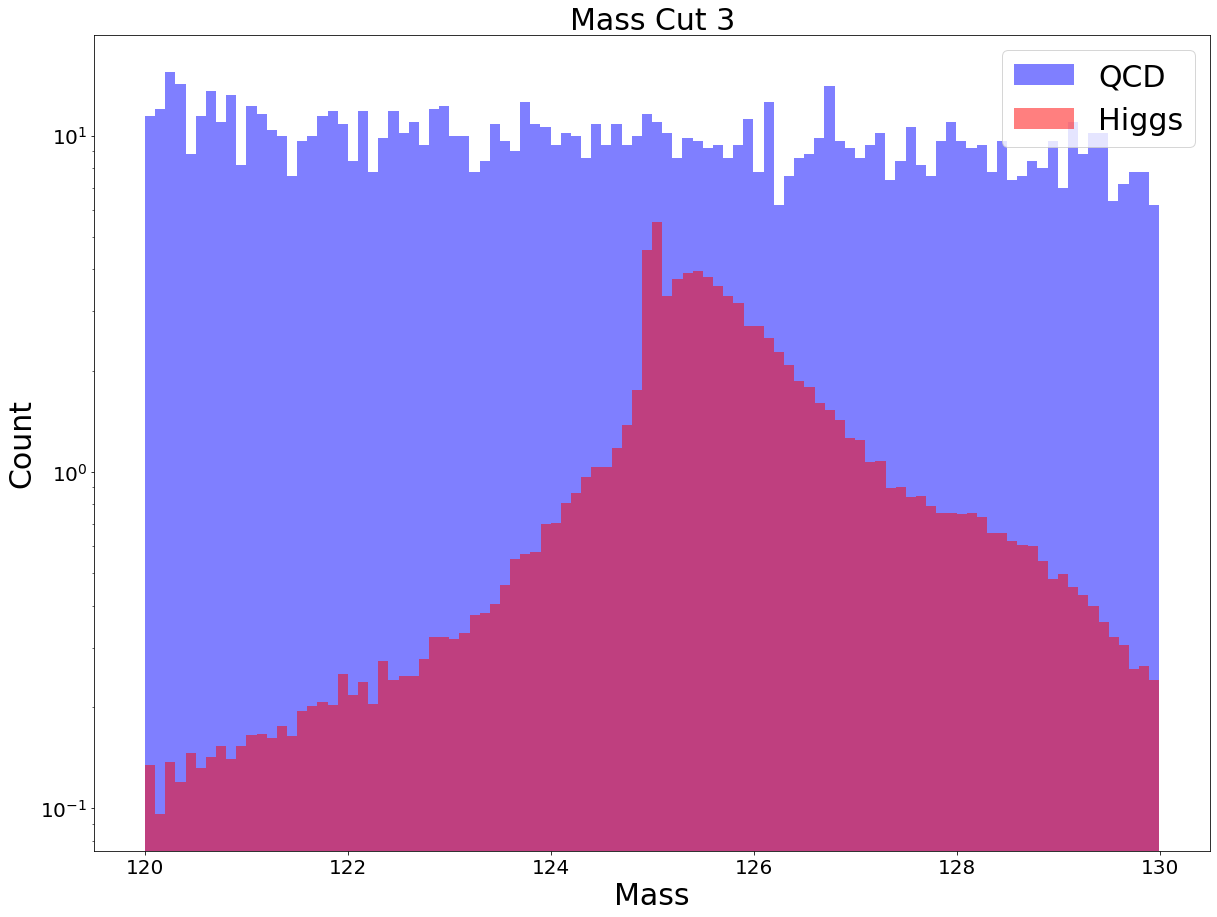

Expected Significance: 3.156445787455472


In [124]:
n3, temp1, temp2 = plt.hist(bkgd3, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd3)))
plt.hist(cut3 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(cut3), len(cut3)))
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut 3', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut3 = np.sum(n3)

prob_cut3 = stats.poisson.cdf(bkgd_cut3 + mu_signal, mu=bkgd_cut3, loc=0)
ex_sig_cut3 = stats.norm.ppf(prob_cut3, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut3)

In [125]:
bottom4 = 124
upper4 = 130

bkgd_mask4 = (qcd_df['mass'] >= bottom4) & (qcd_df['mass'] <= upper4)
cut_mask4 = (higgs_df['mass'] >= bottom4) & (higgs_df['mass'] <= upper4)

bkgd4 = qcd_df[bkgd_mask4]['mass']
cut4 = higgs_df[cut_mask4]['mass']

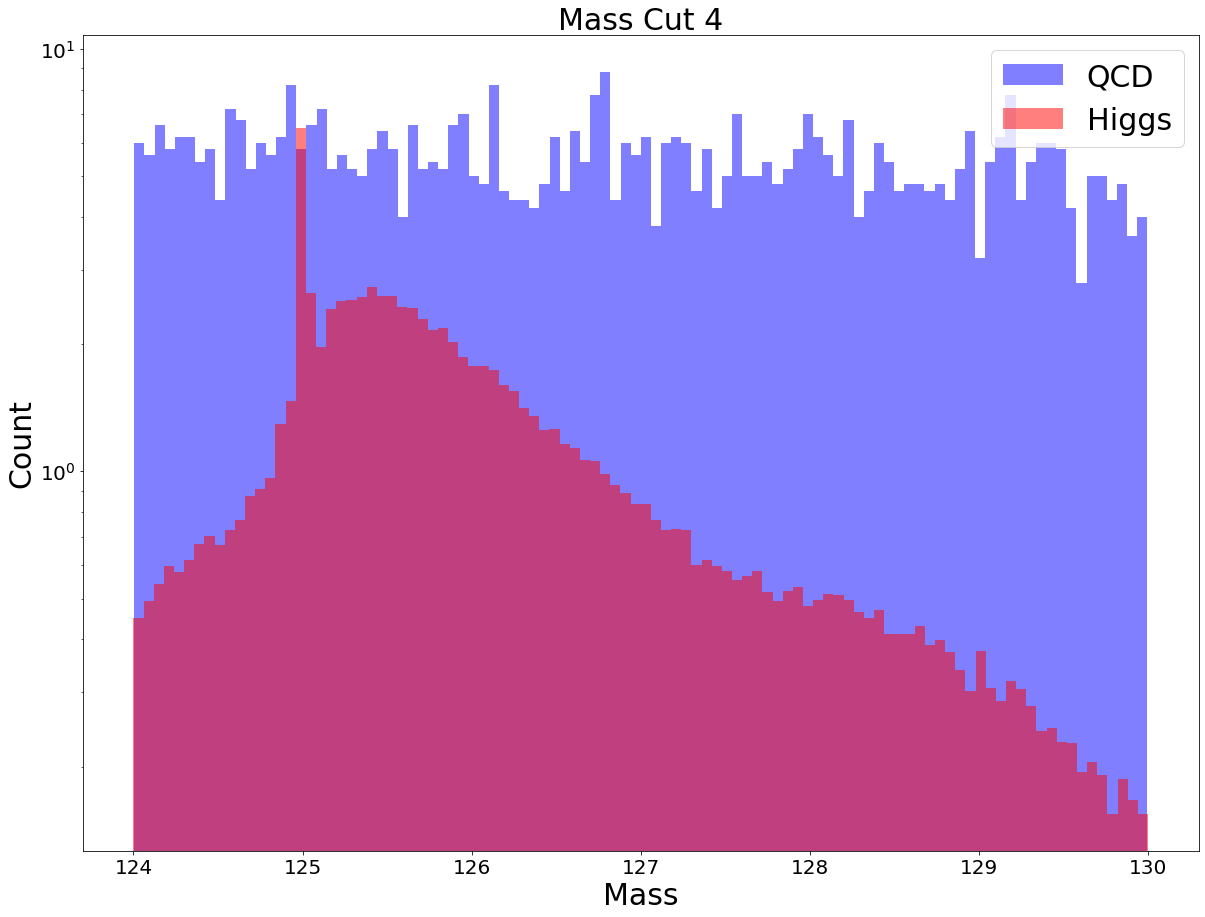

Expected Significance: 4.140890682359838


In [126]:
n4, temp1, temp2 = plt.hist(bkgd4, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd4)))
plt.hist(cut4 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(cut4), len(cut4)))
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut 4', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut4 = np.sum(n4)

prob_cut4 = stats.poisson.cdf(bkgd_cut4 + mu_signal, mu=bkgd_cut4, loc=0)
ex_sig_cut4 = stats.norm.ppf(prob_cut4, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut4)

In [127]:
print('Mass Cut 1 Expected Significance:', ex_sig_cut1, '| range:', (bottom1 ,upper1))
print('Mass Cut 2 Expected Significance:', ex_sig_cut2, '| range:', (bottom2 ,upper2))
print('Mass Cut 3 Expected Significance:', ex_sig_cut3, '| range:', (bottom3 ,upper3))
print('Mass Cut 4 Expected Significance:', ex_sig_cut4, '| range:', (bottom4 ,upper4))

Mass Cut 1 Expected Significance: 1.9816154300925315 | range: (104.89238664552165, 124.89238664552165)
Mass Cut 2 Expected Significance: 2.791596274316958 | range: (109.89238664552165, 119.89238664552165)
Mass Cut 3 Expected Significance: 3.156445787455472 | range: (120, 130)
Mass Cut 4 Expected Significance: 4.140890682359838 | range: (124, 130)


So from our mass cuts we can see that Mass Cut 4 which is betwween the range of (124, 130) gives us the highest expected significance of 4.14.

### 3. Make two sets of stacked histogram plots for the rest of the features
+ Set A without any event selection
  + Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)
+ Set B with your optimal mass cuts
  + Can you identify another feature to further improve your expected signifiance?

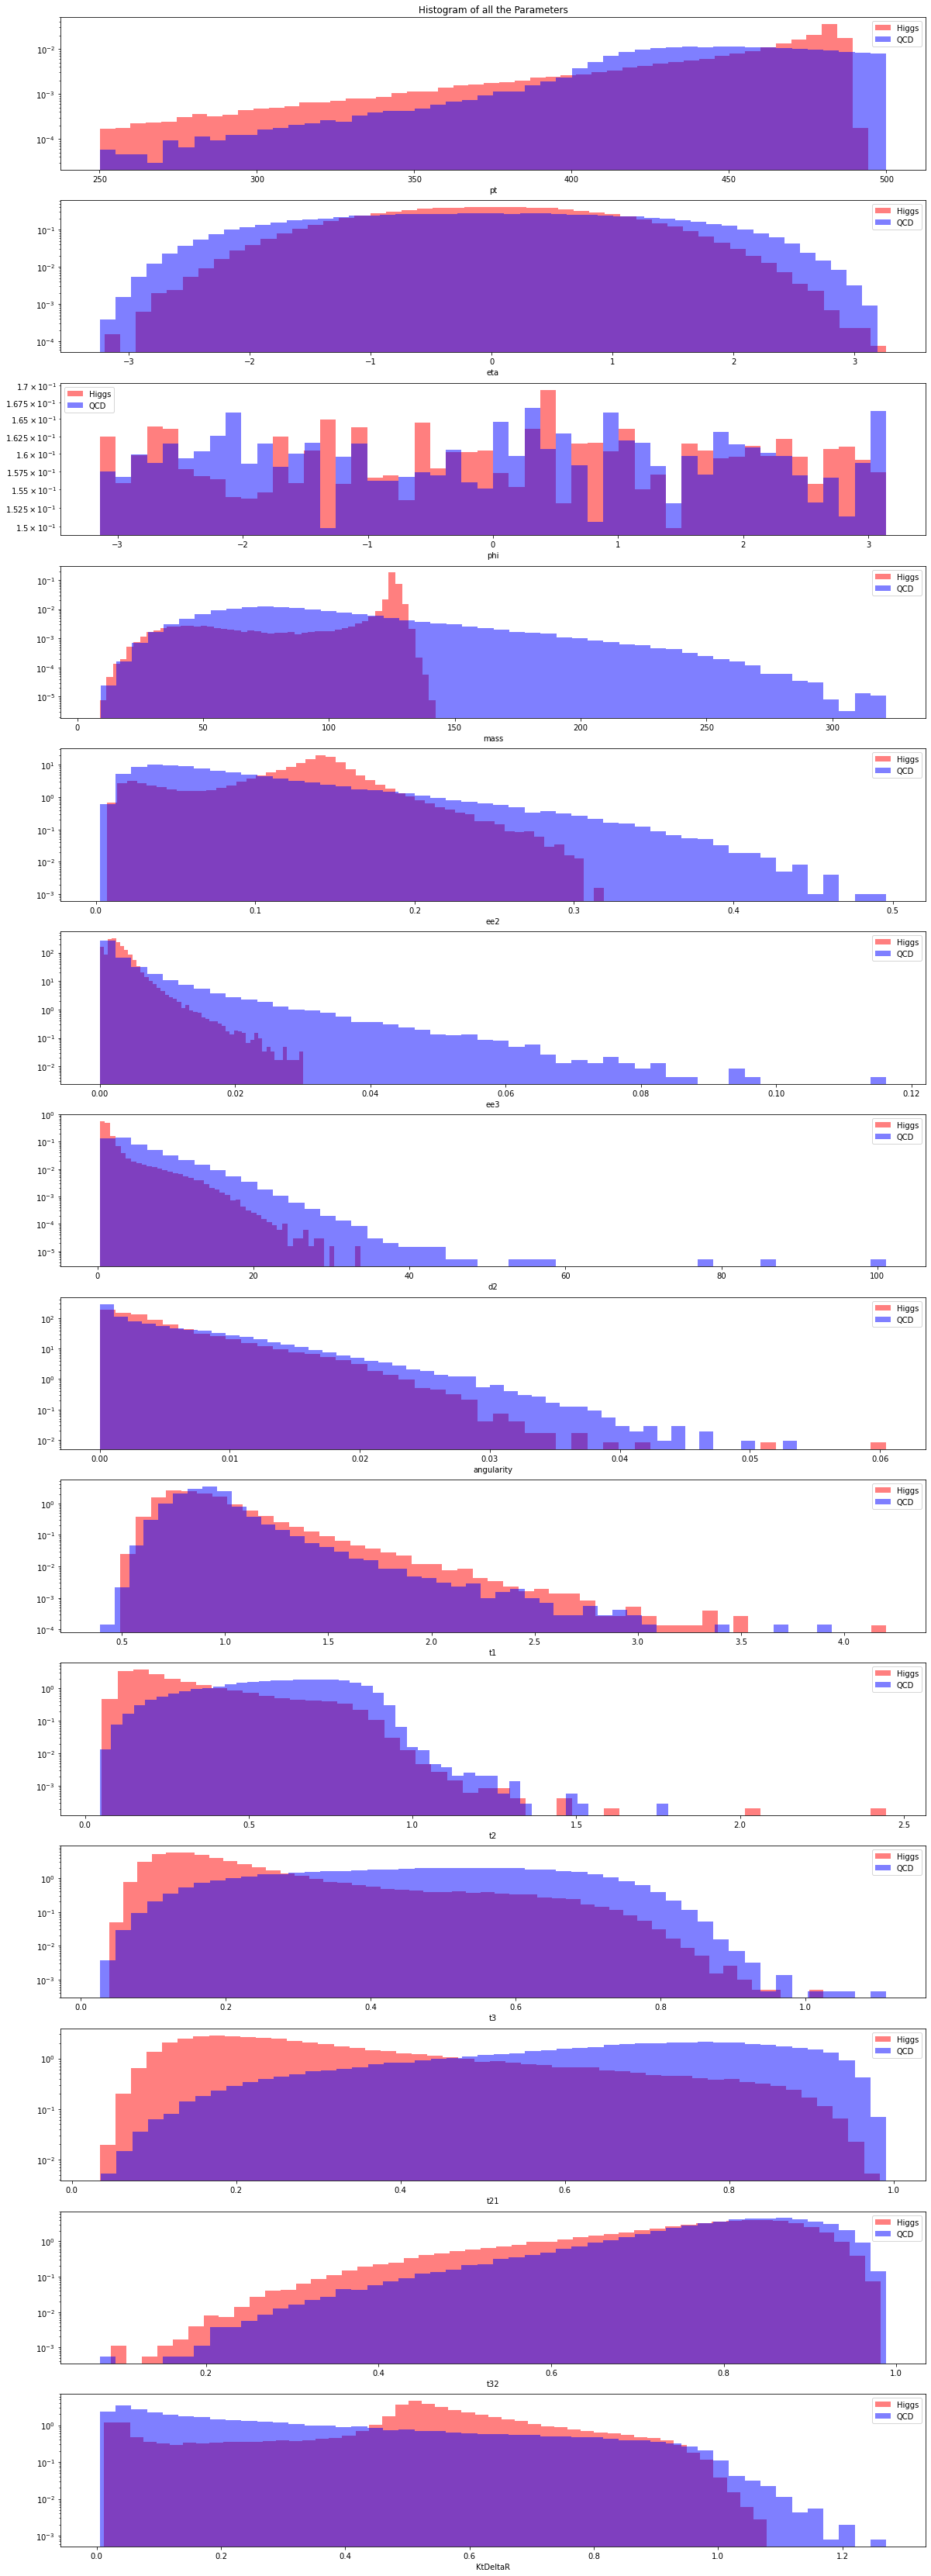

In [17]:
higgs = np.array(higgs_data)
qcd = np.array(qcd_data)

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14) = plt.subplots(14,1, figsize=(20,60))
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14)
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
axes[0].set_title("Histogram of all the Parameters")


for i in range(0,14):
    axes[i].hist(higgs[:,i],bins = 50, density = True, color='red', alpha = 0.5, label="Higgs")
    axes[i].hist(qcd[:,i],bins = 50, density = True, color='blue', alpha = 0.5, label = "QCD")
    axes[i].set_xlabel(labels[i])
    axes[i].legend()
    axes[i].set_yscale('log')
plt.show()

In [36]:
qcd_data.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001646,-0.002151,0.116106,-0.065045,-0.071166,0.044540,-0.006096,-0.015842,-0.015435,-0.012933,-0.010350,0.002034,-0.020723
eta,0.001646,1.000000,0.001982,0.000331,-0.000829,0.000016,0.003129,0.001901,0.001541,0.003722,0.001989,0.002678,-0.002362,0.002631
phi,-0.002151,0.001982,1.000000,0.001781,-0.000084,-0.001442,0.000616,0.002013,0.000068,0.003766,0.004418,0.003519,0.002664,-0.003412
mass,0.116106,0.000331,0.001781,1.000000,0.944705,0.823995,-0.609440,0.395267,0.047805,-0.518935,-0.597166,-0.571218,-0.369384,0.709354
ee2,-0.065045,-0.000829,-0.000084,0.944705,1.000000,0.888003,-0.660044,0.335057,0.161316,-0.519772,-0.613476,-0.621209,-0.412979,0.661513
ee3,-0.071166,0.000016,-0.001442,0.823995,0.888003,1.000000,-0.413854,0.346522,0.163273,-0.304939,-0.408181,-0.388633,-0.400095,0.533815
d2,0.044540,0.003129,0.000616,-0.609440,-0.660044,-0.413854,1.000000,-0.174517,-0.110423,0.505221,0.553272,0.600450,0.239771,-0.466225
angularity,-0.006096,0.001901,0.002013,0.395267,0.335057,0.346522,-0.174517,1.000000,0.013484,-0.069498,-0.099513,-0.090325,-0.109640,0.263082
t1,-0.015842,0.001541,0.000068,0.047805,0.161316,0.163273,-0.110423,0.013484,1.000000,0.285307,0.206263,-0.087536,-0.151472,-0.209706
t2,-0.015435,0.003722,0.003766,-0.518935,-0.519772,-0.304939,0.505221,-0.069498,0.285307,1.000000,0.934555,0.913813,0.057613,-0.675798


In [37]:
higgs_data.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,-0.002129,0.001585,0.175370,-0.254340,-0.463733,-0.052192,-0.087057,-0.035002,-0.077958,-0.088589,-0.067704,-0.007152,-0.128198
eta,-0.002129,1.000000,-0.000406,0.000956,0.002153,0.004534,-0.000151,0.004274,0.002319,0.001370,0.001221,0.000088,-0.000048,-0.000458
phi,0.001585,-0.000406,1.000000,-0.002895,-0.005504,-0.004968,0.003222,0.001009,-0.004121,-0.001214,0.001452,0.000322,0.003567,0.000358
mass,0.175370,0.000956,-0.002895,1.000000,0.813764,0.445566,-0.836983,0.037857,-0.019461,-0.698137,-0.811544,-0.710751,-0.135391,0.654055
ee2,-0.254340,0.002153,-0.005504,0.813764,1.000000,0.737763,-0.772951,-0.131983,0.230258,-0.537445,-0.665586,-0.639195,-0.213722,0.468551
ee3,-0.463733,0.004534,-0.004968,0.445566,0.737763,1.000000,-0.366714,0.062178,0.199961,0.006620,-0.153715,-0.068111,-0.393777,0.263007
d2,-0.052192,-0.000151,0.003222,-0.836983,-0.772951,-0.366714,1.000000,0.081458,-0.033893,0.692267,0.782655,0.728085,0.075884,-0.554474
angularity,-0.087057,0.004274,0.001009,0.037857,-0.131983,0.062178,0.081458,1.000000,-0.244415,0.058273,0.055166,0.152686,-0.000888,0.266979
t1,-0.035002,0.002319,-0.004121,-0.019461,0.230258,0.199961,-0.033893,-0.244415,1.000000,0.190188,0.106375,-0.094686,-0.223568,-0.301780
t2,-0.077958,0.001370,-0.001214,-0.698137,-0.537445,0.006620,0.692267,0.058273,0.190188,1.000000,0.927438,0.943797,-0.330452,-0.661620


Based on the correlation tables, we can see that mass and ee2 have a high correlation of 0.944 in the QCD data and 0.813 in the Higgs. So based on this we will investigate ee2.

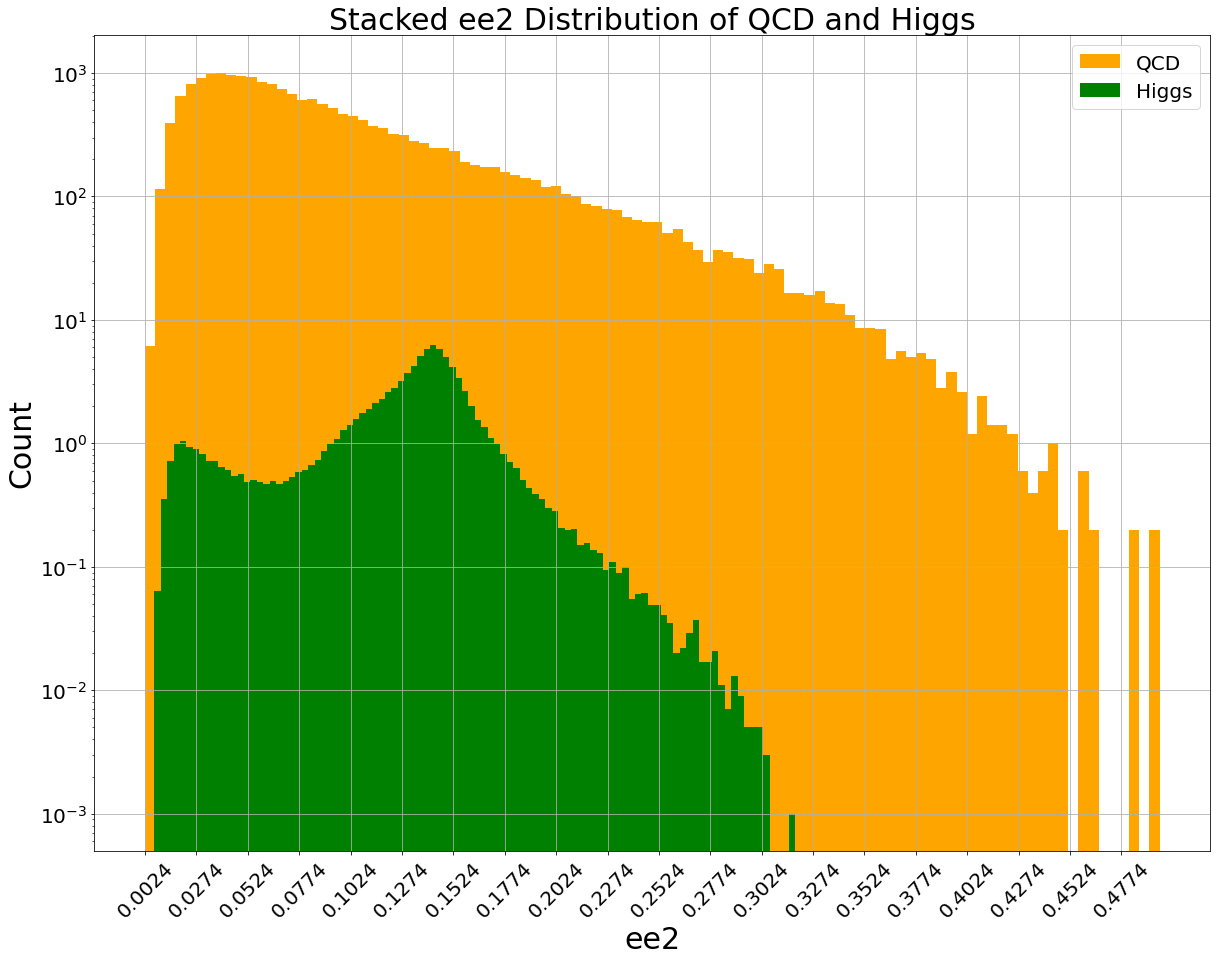

In [50]:
plt.hist(qcd_df['ee2'], bins=100, label = 'QCD', stacked=True, color='orange', weights=np.repeat(20000/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['ee2'], bins=100, label = 'Higgs', stacked=True, color='green', weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.xticks(np.arange(min(qcd_df['ee2']), max(qcd_df['ee2']), 0.025), rotation=45)
plt.yscale("log")
plt.title('Stacked ee2 Distribution of QCD and Higgs', fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.show()

Based on our histogram I can predict that a cut around the peak in our Higgs data will yield a higher significance. So this cut should be greater than 0.12 and less than 0.15.

In [128]:
bottom5 = 0.12
upper5 = 0.15

bkgd_mask5 = (qcd_df['ee2'] >= bottom5) & (qcd_df['ee2'] <= upper5)
cut_mask5 = (higgs_df['ee2'] >= bottom5) & (higgs_df['ee2'] <= upper5)

bkgd5 = qcd_df[bkgd_mask5]['ee2']
cut5 = higgs_df[cut_mask5]['ee2']

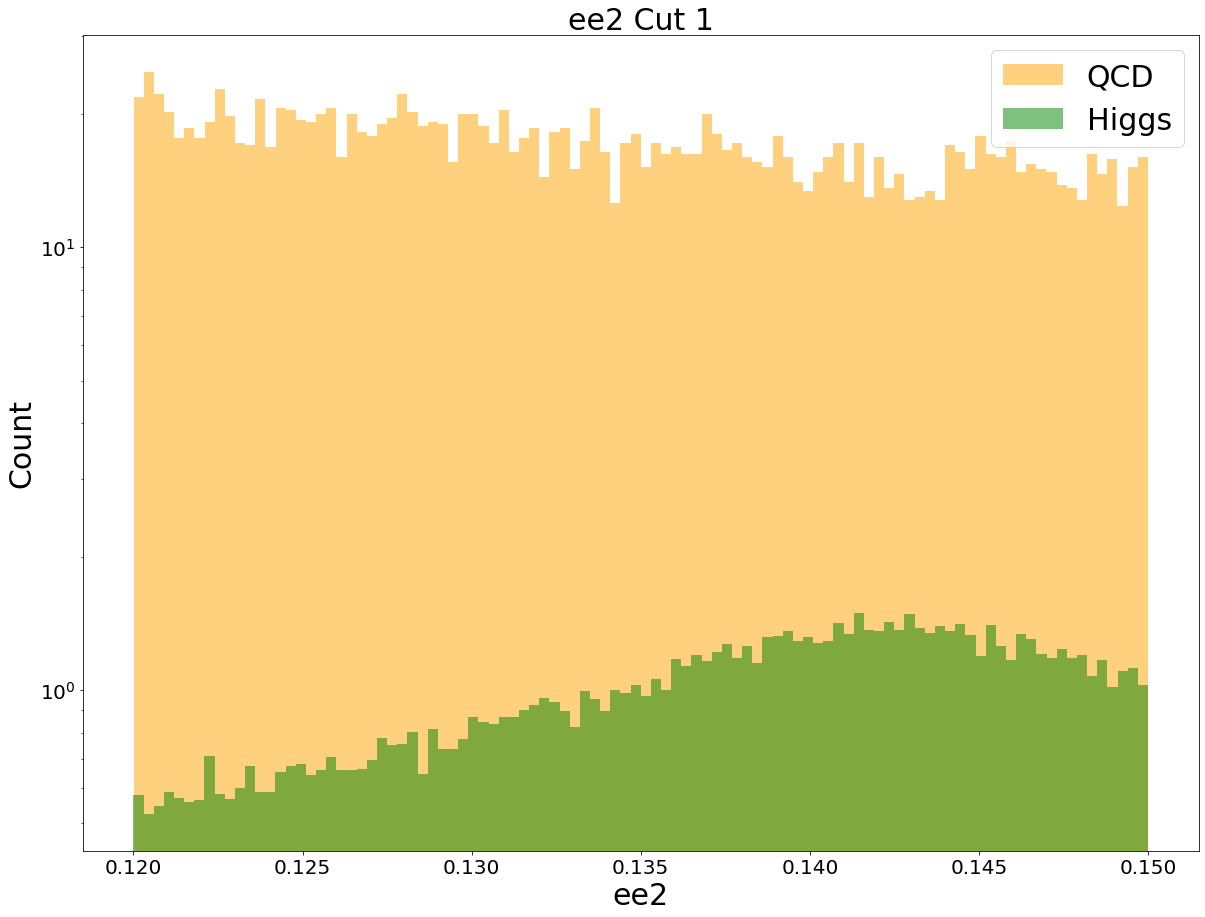

Expected Significance: 2.3950744418662806


In [129]:
n5, temp1, temp2 = plt.hist(bkgd5, bins=100, alpha=0.5, color="orange", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd5)))
plt.hist(cut5 , bins=100, alpha=0.5, color="green", label='Higgs',weights=np.repeat(100/len(cut5), len(cut5)))
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('ee2 Cut 1', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut5 = np.sum(n5)

prob_cut5 = stats.poisson.cdf(bkgd_cut5 + mu_signal, mu=bkgd_cut5, loc=0)
ex_sig_cut5 = stats.norm.ppf(prob_cut5, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut5)

### 4. Optimize event selections using multiple features (if necessary)
+ Find a set of feature cuts which achieve high expected significance.
+ Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

In [130]:
bottom6 = 0.125
upper6 = 0.155

bkgd_mask6 = (qcd_df['ee2'] >= bottom6) & (qcd_df['ee2'] <= upper6)
cut_mask6 = (higgs_df['ee2'] >= bottom6) & (higgs_df['ee2'] <= upper6)

bkgd6 = qcd_df[bkgd_mask6]['ee2']
cut6 = higgs_df[cut_mask6]['ee2']

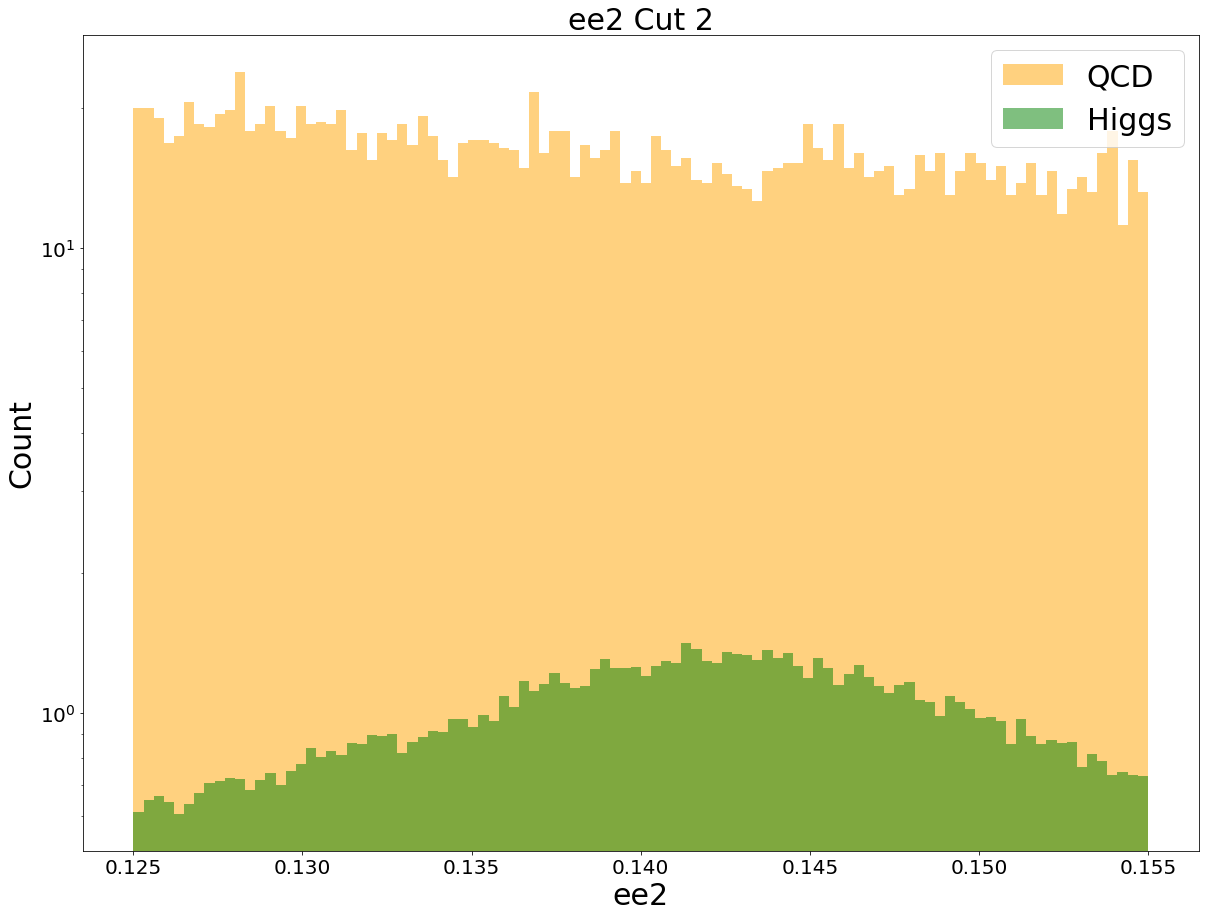

Expected Significance: 2.463794997052523


In [131]:
n6, temp1, temp2 = plt.hist(bkgd6, bins=100, alpha=0.5, color="orange", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd6)))
plt.hist(cut6 , bins=100, alpha=0.5, color="green", label='Higgs',weights=np.repeat(100/len(cut6), len(cut6)))
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('ee2 Cut 2', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut6 = np.sum(n6)

prob_cut6 = stats.poisson.cdf(bkgd_cut6 + mu_signal, mu=bkgd_cut6, loc=0)
ex_sig_cut6 = stats.norm.ppf(prob_cut6, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut6)

In [132]:
bottom7 = 0.1274
upper7 = 0.1524

bkgd_mask7 = (qcd_df['ee2'] >= bottom7) & (qcd_df['ee2'] <= upper7)
cut_mask7 = (higgs_df['ee2'] >= bottom7) & (higgs_df['ee2'] <= upper7)

bkgd7 = qcd_df[bkgd_mask7]['ee2']
cut7 = higgs_df[cut_mask7]['ee2']

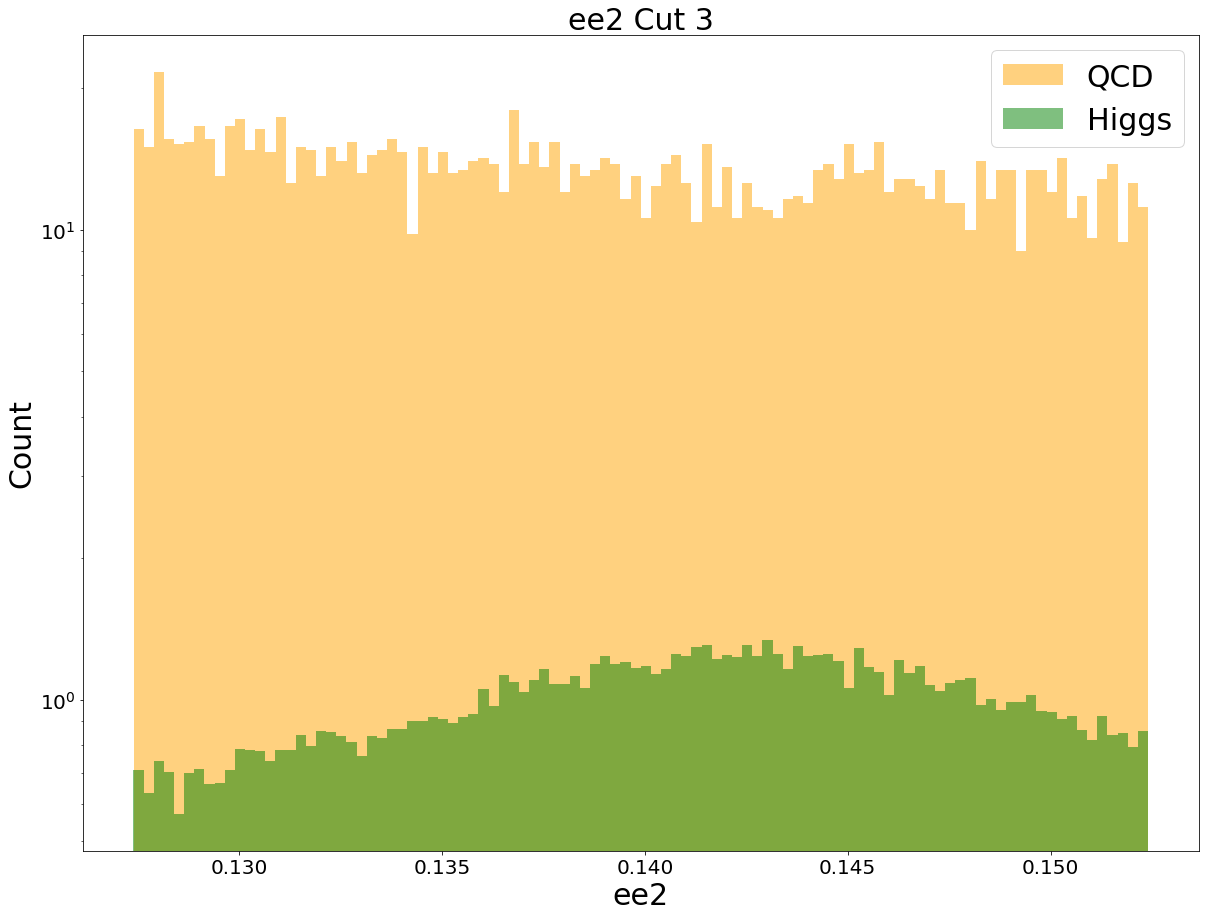

Expected Significance: 2.7071891781177357


In [133]:
n7, temp1, temp2 = plt.hist(bkgd7, bins=100, alpha=0.5, color="orange", label='QCD', weights=np.repeat(20000/len(qcd_df), len(bkgd7)))
plt.hist(cut7 , bins=100, alpha=0.5, color="green", label='Higgs',weights=np.repeat(100/len(cut7), len(cut7)))
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('ee2 Cut 3', fontsize=30)
plt.legend(fontsize=30)
plt.show()

bkgd_cut7 = np.sum(n7)

prob_cut7 = stats.poisson.cdf(bkgd_cut7 + mu_signal, mu=bkgd_cut7, loc=0)
ex_sig_cut7 = stats.norm.ppf(prob_cut7, loc=0, scale=1)
print("Expected Significance:",ex_sig_cut7)

In [78]:
print('ee2 Cut 1 Expected Significance:', ex_sig_cut5, '| range:', (bottom5 ,upper5))
print('ee2 Cut 2 Expected Significance:', ex_sig_cut6, '| range:', (bottom6 ,upper6))
print('ee2 Cut 3 Expected Significance:', ex_sig_cut7, '| range:', (bottom7, upper7))

ee2 Cut 1 Expected Significance: 2.3950744418662806 | range: (0.12, 0.15)
ee2 Cut 2 Expected Significance: 2.463794997052523 | range: (0.125, 0.155)
ee2 Cut 3 Expected Significance: 2.7071891781177357 | range: (0.1274, 0.1524)


After testing several ranges of cuts for ee2, I found the range of (0.1274, 0.1524) to have the highest significance of 2.707

## Lab 8

In [80]:
highLumi = pd.read_hdf('data_highLumi_pt_250_500.h5')
lowLumi = pd.read_hdf('data_lowLumi_pt_250_500.h5') 

### 1. High luminosity data
+ For each feature of your event selection, plot the observed data overlapped with expected signal and background (normalized to observed yields) with/without event selection.
+ Evaluate observed significance and compare your results to expectation.


In [87]:
highLumi_df = pd.DataFrame(highLumi)
highLumi_df.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
highLumi_df

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983
3,474.234962,1.501633,-1.656456,90.085535,0.061264,0.001368,5.948416,0.001163,1.354343,0.698983,0.668163,0.516104,0.955908,0.096045
4,485.597724,1.021424,1.742641,119.889999,0.133209,0.003223,1.363644,0.001526,0.905440,0.354629,0.219775,0.391665,0.619733,0.406962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40339,463.278465,1.715067,-2.254925,79.321004,0.066043,0.001196,4.150582,0.000477,0.837033,0.602315,0.573286,0.719583,0.951804,0.266005
40340,418.496927,-2.246578,1.679789,44.635757,0.030060,0.000199,7.316158,0.000066,0.922342,0.801027,0.579431,0.868470,0.723360,0.037072
40341,474.840070,-0.981801,3.135062,55.302586,0.031332,0.000290,9.421780,0.003184,0.814772,0.695005,0.503360,0.853005,0.724255,0.102287
40342,460.901330,0.764519,-0.736565,72.333900,0.037743,0.000560,10.421032,0.005506,0.910557,0.675996,0.491189,0.742398,0.726616,0.059109


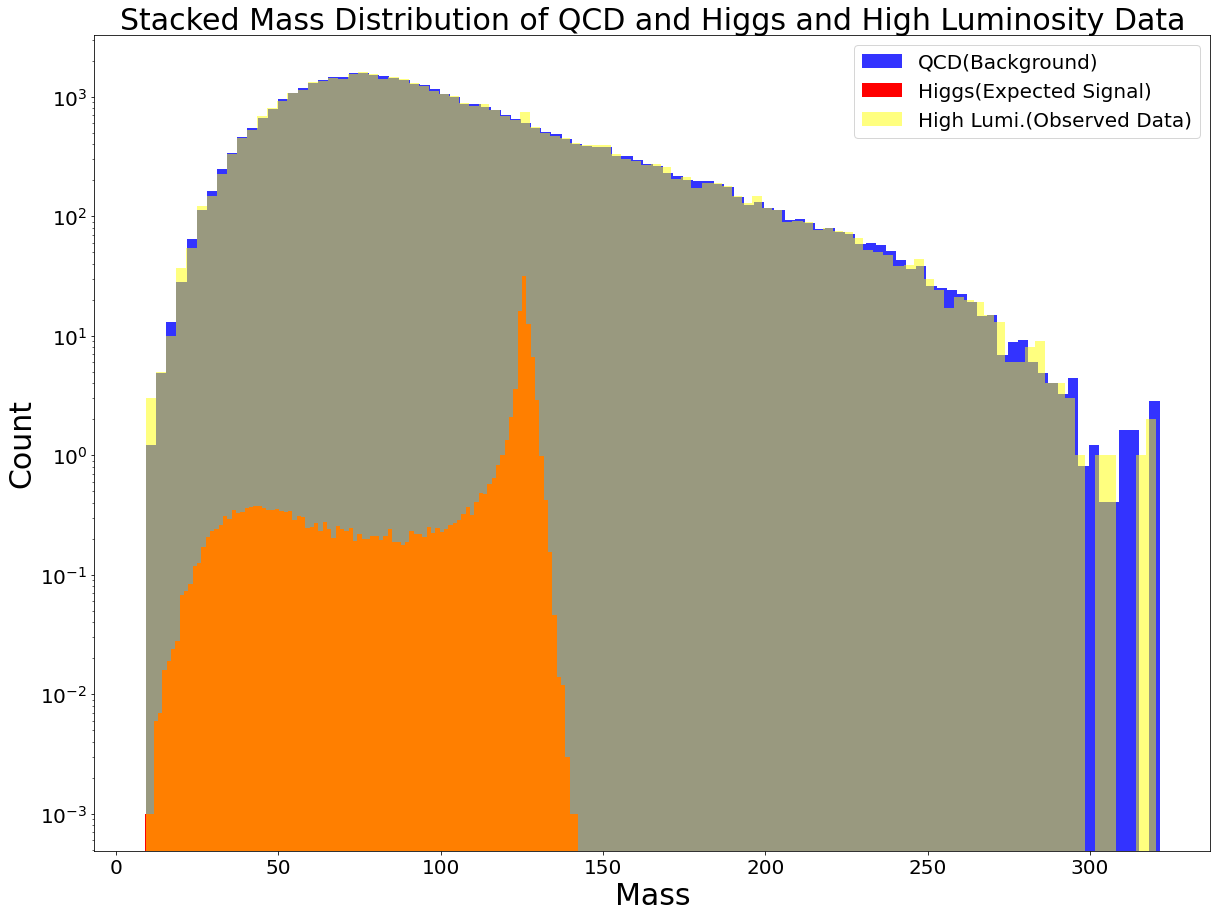

In [111]:
plt.hist(qcd_df['mass'], bins=100, label = 'QCD(Background)', stacked=True, color='blue', alpha=0.8,weights=np.repeat(40344/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['mass'], bins=100, label = 'Higgs(Expected Signal)', stacked=True, color='red', alpha=1, weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
h, temp1, temp2 = plt.hist(highLumi_df['mass'], bins=100, label= 'High Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Stacked Mass Distribution of QCD and Higgs and High Luminosity Data', fontsize=30)
plt.legend(fontsize=20)
plt.show()

In [156]:
hiLu_mu_observed = np.sum(h)
mu_signal = 100

So now to calculate our significance without event selection:

In [142]:
hiLu_prob = stats.poisson.cdf(hiLu_mu_observed + mu_signal, mu=hiLu_mu_observed, loc=0)
hiLu_ex_sig = stats.norm.ppf(hiLu_prob, loc=0, scale=1)
print("Observed Significance:", hiLu_ex_sig)

n_higgs = (sum(higgs_df['mass']) / sum(higgs_df['mass']))*100
n_qcd_sqrt = ((sum(highLumi_df['mass'])/sum(highLumi_df['mass']))*hiLu_mu_observed)**(0.5)

print("ratio: ", n_higgs/n_qcd_sqrt)

Observed Significance: 0.5009749979519945
ratio:  0.4978637688583695


So now using our optimal mass cuts, that we found earlier in Lab 7, we apply the cut and calculate the significance:

In [164]:
opt_bottom1 = 124
opt_upper1 = 130

hiLu_bkgd_mask1 = (qcd_df['mass'] >= opt_bottom1) & (qcd_df['mass'] <= opt_upper1)
hiLu_cut_mask1 = (higgs_df['mass'] >= opt_bottom1) & (higgs_df['mass'] <= opt_upper1)
hiLu_mask1 = (highLumi_df['mass'] >= opt_bottom1) & (highLumi_df['mass'] <= opt_upper1)

hiLu_bkgd1 = qcd_df[hiLu_bkgd_mask1]['mass']
hiLu_cut1 = higgs_df[hiLu_cut_mask1]['mass']
hiLu_observed1 = highLumi_df[hiLu_mask1]['mass']

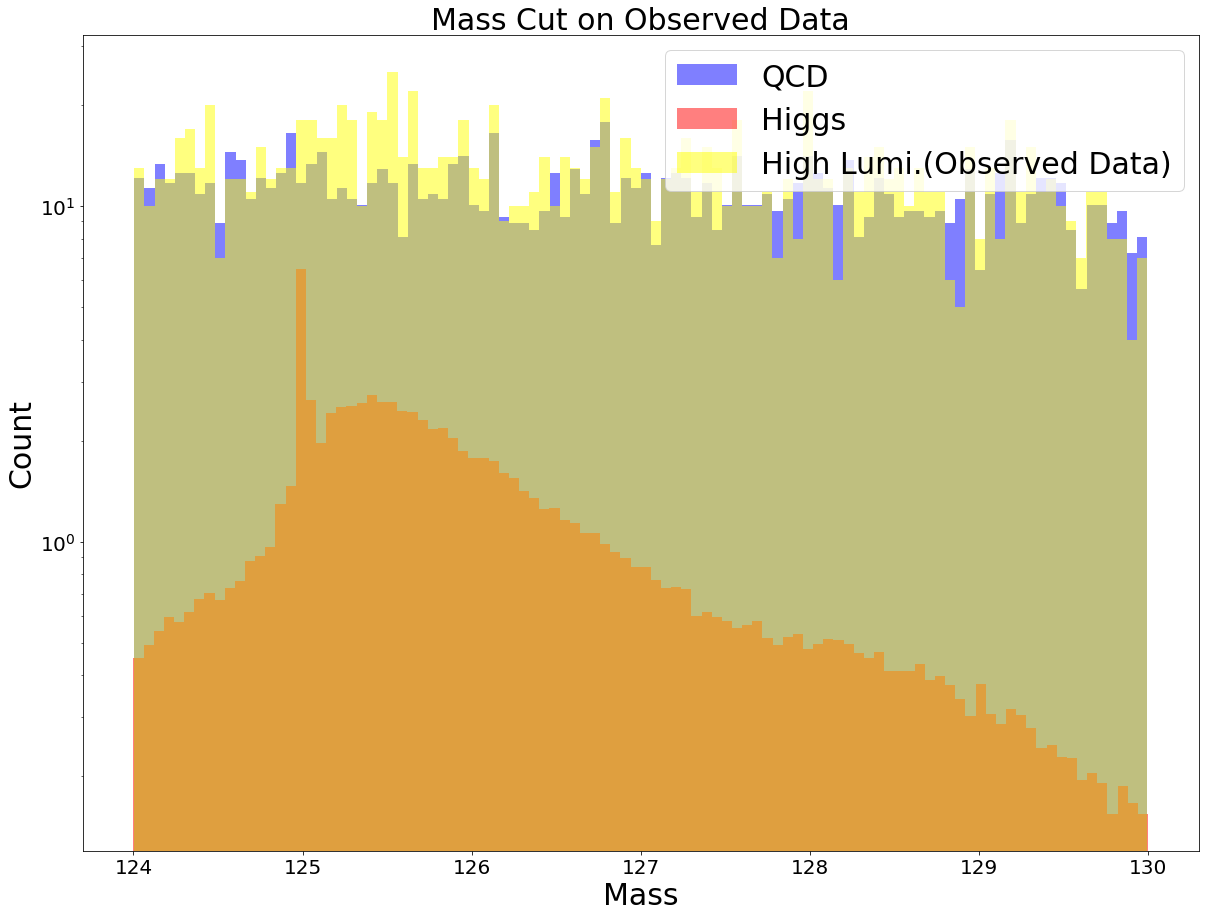

Observed Significance: 2.7812339230378784
Expected Significance: 4.140890682359838


In [165]:
plt.hist(hiLu_bkgd1, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(40344/len(qcd_df), len(hiLu_bkgd1)))
plt.hist(hiLu_cut1 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(hiLu_cut1), len(hiLu_cut1)))
h1, temp1, temp2 = plt.hist(hiLu_observed1, bins=100, label= 'High Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut on Observed Data', fontsize=30)
plt.legend(fontsize=30)
plt.show()

hiLu_obs_cut1 = np.sum(h1)

hiLu_prob_cut1 = stats.poisson.cdf(hiLu_obs_cut1 + mu_signal, mu=hiLu_obs_cut1, loc=0)
hiLu_ex_sig_cut1 = stats.norm.ppf(hiLu_prob_cut1, loc=0, scale=1)
print("Observed Significance:",hiLu_ex_sig_cut1)
print('Expected Significance:', ex_sig_cut4)

So here we see our Observed significance after using our optimal mass cut is 2.78. While our Expected Significance was 4.14

Now we will look at the ee2 of the Observed Data and apply our optimal cuts from Lab 7 and see what the signifance is.

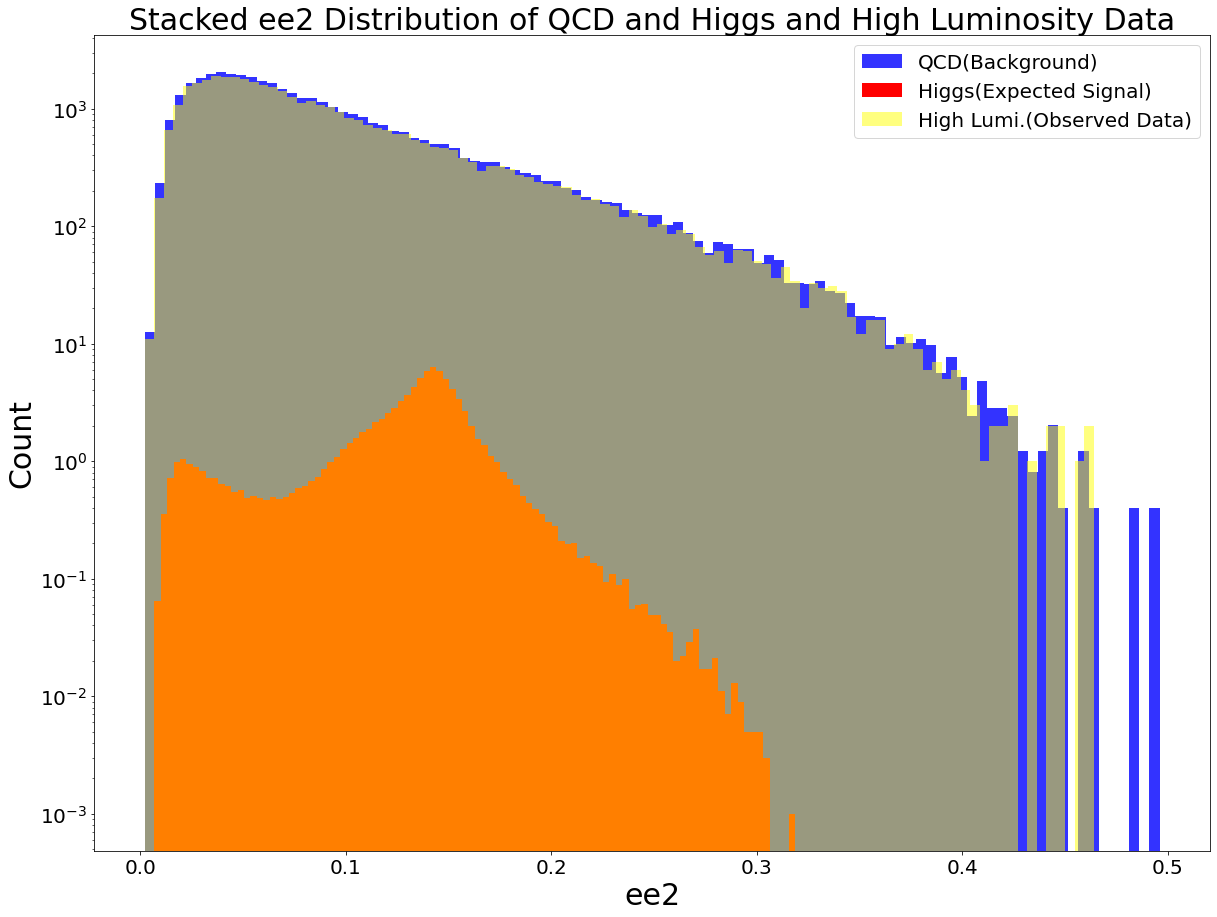

In [138]:
plt.hist(qcd_df['ee2'], bins=100, label = 'QCD(Background)', stacked=True, color='blue', alpha=0.8,weights=np.repeat(40344/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['ee2'], bins=100, label = 'Higgs(Expected Signal)', stacked=True, color='red', alpha=1, weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
plt.hist(highLumi_df['ee2'], bins=100, label= 'High Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Stacked ee2 Distribution of QCD and Higgs and High Luminosity Data', fontsize=30)
plt.legend(fontsize=20)
plt.show()

In [162]:
opt_bottom2 = 0.1274
opt_upper2 = 0.1524

hiLu_bkgd_mask2 = (qcd_df['ee2'] >= opt_bottom2) & (qcd_df['ee2'] <= opt_upper2)
hiLu_cut_mask2 = (higgs_df['ee2'] >= opt_bottom2) & (higgs_df['ee2'] <= opt_upper2)
hiLu_mask2 = (highLumi_df['ee2'] >= opt_bottom2) & (highLumi_df['ee2'] <= opt_upper2)

hiLu_bkgd2 = qcd_df[hiLu_bkgd_mask2]['ee2']
hiLu_cut2 = higgs_df[hiLu_cut_mask2]['ee2']
hiLu_observed2 = highLumi_df[hiLu_mask2]['ee2']

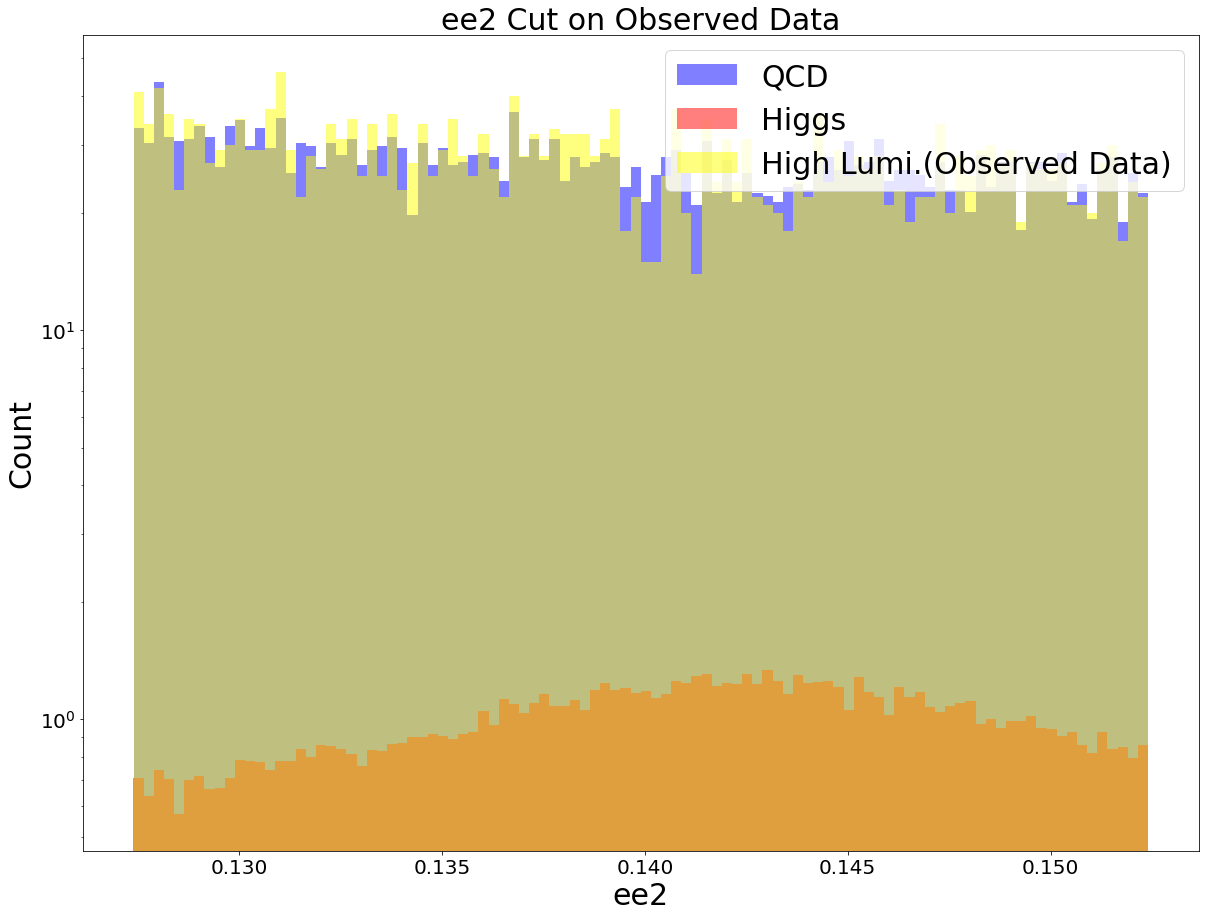

Observed Significance: 1.9043606304310592
Expected Significance: 2.7071891781177357


In [163]:
plt.hist(hiLu_bkgd2, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(40344/len(qcd_df), len(hiLu_bkgd2)))
plt.hist(hiLu_cut2 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(hiLu_cut2), len(hiLu_cut2)))
h2, temp1, temp2 = plt.hist(hiLu_observed2, bins=100, label= 'High Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('ee2 Cut on Observed Data', fontsize=30)
plt.legend(fontsize=30)
plt.show()

hiLu_obs_cut2 = np.sum(h2)

hiLu_prob_cut2 = stats.poisson.cdf(hiLu_obs_cut2 + mu_signal, mu=hiLu_obs_cut2, loc=0)
hiLu_ex_sig_cut2 = stats.norm.ppf(hiLu_prob_cut2, loc=0, scale=1)
print("Observed Significance:",hiLu_ex_sig_cut2)
print('Expected Significance:', ex_sig_cut7)

For the ee2 feature, we see that our observed significance is 1.90 while our expected significance is around 2.70.

### 2. Low luminosity data
+ Do as before with the high luminosity data and comment on the difference.

In [154]:
lowLumi_df = pd.DataFrame(lowLumi)
lowLumi_df.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
lowLumi_df

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,499.974801,-0.340430,-3.124063,35.763836,0.016922,0.000061,12.505765,0.003937,1.181578,0.797111,0.724045,0.674615,0.908337,0.026663
1,470.525978,1.447995,-0.463162,79.069978,0.052447,0.000801,5.549873,0.000965,0.924677,0.752034,0.679503,0.813294,0.903554,0.136669
2,455.009985,-1.672870,-2.260314,56.401982,0.030301,0.000229,8.234025,0.000417,0.892902,0.630183,0.538919,0.705769,0.855178,0.106421
3,387.414081,-1.002107,-2.688377,77.412447,0.092790,0.001888,2.363279,0.002206,0.975771,0.461347,0.338407,0.472803,0.733519,0.324391
4,442.472789,-1.103515,-2.367580,86.479013,0.049532,0.000909,7.483889,0.002174,0.782566,0.668635,0.432825,0.854414,0.647326,0.041830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,485.528722,1.349769,1.178191,101.540846,0.093551,0.002513,3.069102,0.002492,1.006359,0.811150,0.664146,0.806025,0.818770,0.164820
4056,472.231371,1.874326,-0.785502,48.174004,0.025348,0.000161,9.860763,0.000308,1.036714,0.918382,0.721017,0.885858,0.785095,0.038309
4057,407.594270,0.494450,-1.839265,67.141046,0.061750,0.000890,3.778698,0.003875,0.957798,0.730431,0.548445,0.762615,0.750852,0.298864
4058,417.108347,-1.391452,-0.368711,126.643493,0.163618,0.007312,1.669434,0.001432,1.184487,0.673570,0.573632,0.568659,0.851630,0.373660


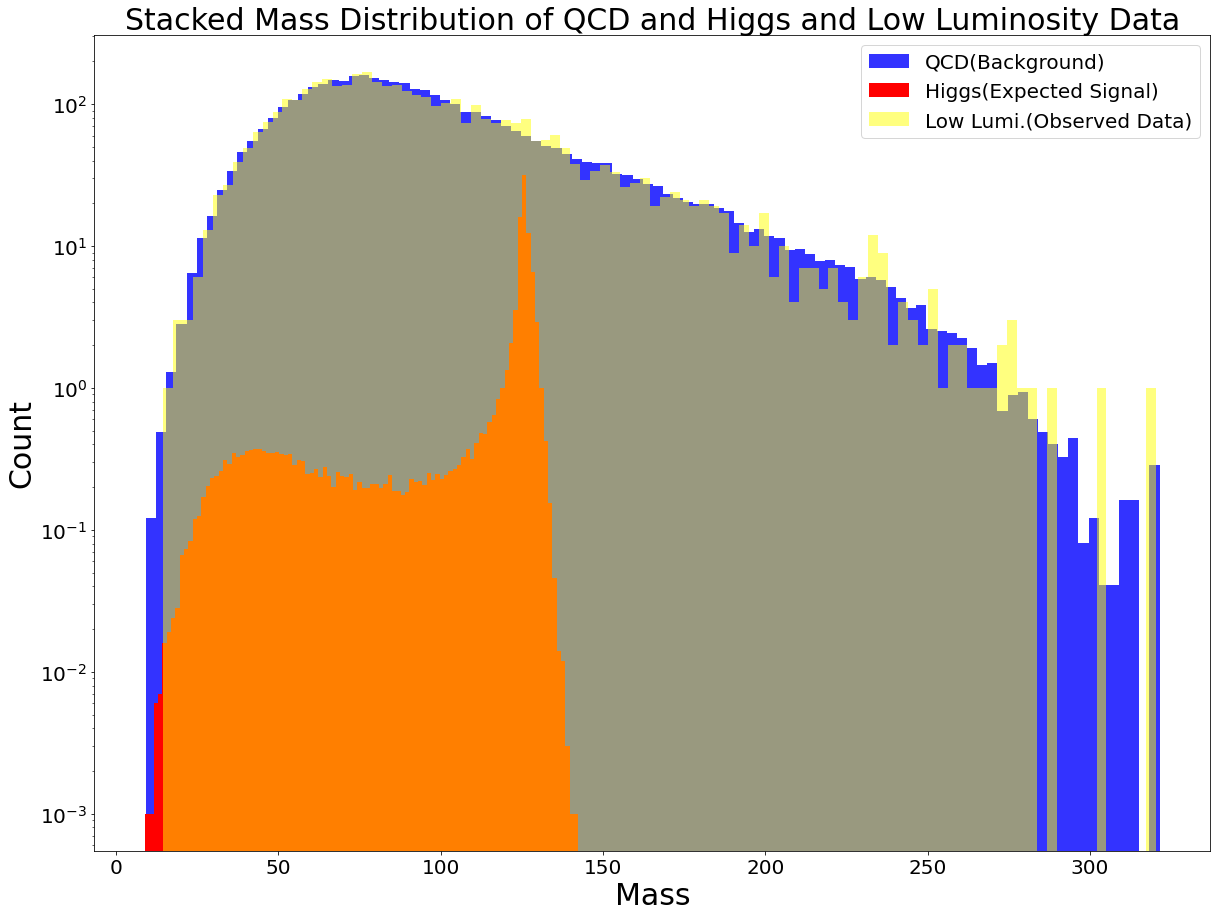

In [155]:
plt.hist(qcd_df['mass'], bins=100, label = 'QCD(Background)', stacked=True, color='blue', alpha=0.8,weights=np.repeat(4060/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['mass'], bins=100, label = 'Higgs(Expected Signal)', stacked=True, color='red', alpha=1, weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
l, temp1, temp2 = plt.hist(lowLumi_df['mass'], bins=100, label= 'Low Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Stacked Mass Distribution of QCD and Higgs and Low Luminosity Data', fontsize=30)
plt.legend(fontsize=20)
plt.show()

In [159]:
loLu_mu_observed = np.sum(l)
mu_signal = 100

Again without event selection:

In [161]:
loLu_prob = stats.poisson.cdf(loLu_mu_observed + mu_signal, mu=loLu_mu_observed, loc=0)
loLu_ex_sig = stats.norm.ppf(loLu_prob, loc=0, scale=1)
print("Observed Significance:", loLu_ex_sig)

n_higgs = (sum(higgs_df['mass']) / sum(higgs_df['mass']))*100
n_qcd_sqrt = ((sum(lowLumi_df['mass'])/sum(lowLumi_df['mass']))*loLu_mu_observed)**(0.5)

print("ratio: ", n_higgs/n_qcd_sqrt)

Observed Significance: 1.5734232418487109
ratio:  1.5694120514358612


In [174]:
loLu_bkgd_mask1 = (qcd_df['mass'] >= opt_bottom1) & (qcd_df['mass'] <= opt_upper1)
loLu_cut_mask1 = (higgs_df['mass'] >= opt_bottom1) & (higgs_df['mass'] <= opt_upper1)
loLu_mask1 = (lowLumi_df['mass'] >= opt_bottom1) & (lowLumi_df['mass'] <= opt_upper1)

loLu_bkgd1 = qcd_df[loLu_bkgd_mask1]['mass']
loLu_cut1 = higgs_df[loLu_cut_mask1]['mass']
loLu_observed1 = lowLumi_df[loLu_mask1]['mass']

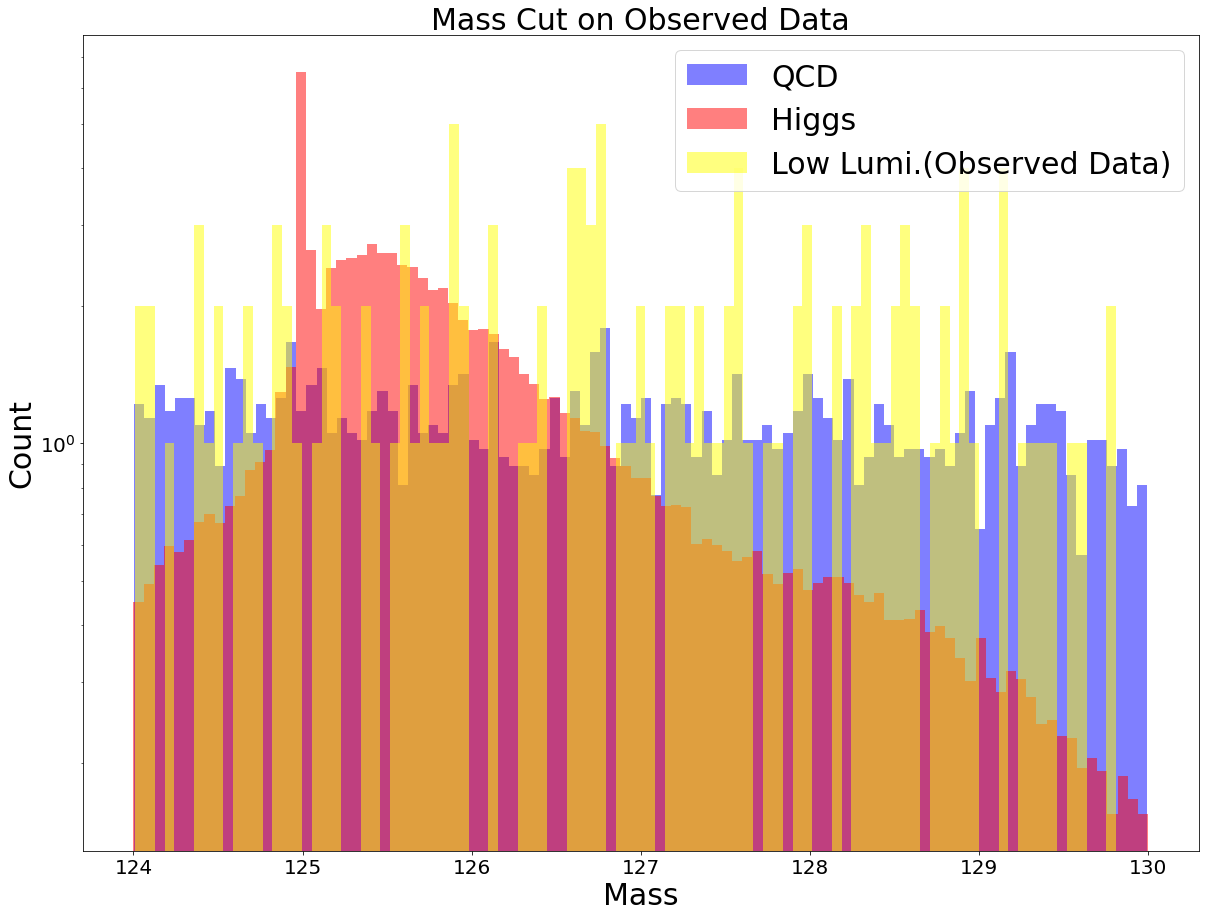

Observed Significance: 7.855028803894085
Expected Significance: 4.140890682359838


In [175]:
plt.hist(loLu_bkgd1, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(4060/len(qcd_df), len(loLu_bkgd1)))
plt.hist(loLu_cut1 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(loLu_cut1), len(loLu_cut1)))
l1, temp1, temp2 = plt.hist(loLu_observed1, bins=100, label= 'Low Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('Mass', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Mass Cut on Observed Data', fontsize=30)
plt.legend(fontsize=30)
plt.show()

loLu_obs_cut1 = np.sum(l1)

loLu_prob_cut1 = stats.poisson.cdf(loLu_obs_cut1 + mu_signal, mu=loLu_obs_cut1, loc=0)
loLu_ex_sig_cut1 = stats.norm.ppf(loLu_prob_cut1, loc=0, scale=1)
print("Observed Significance:", loLu_ex_sig_cut1)
print('Expected Significance:', ex_sig_cut4)

So here we see for the Low Luminosity data, our Observed significance is higher. After using our optimal mass cut is 7.85, while our Expected Significance was 4.14

So again we will do the ee2 feature for the Low Luminosity data

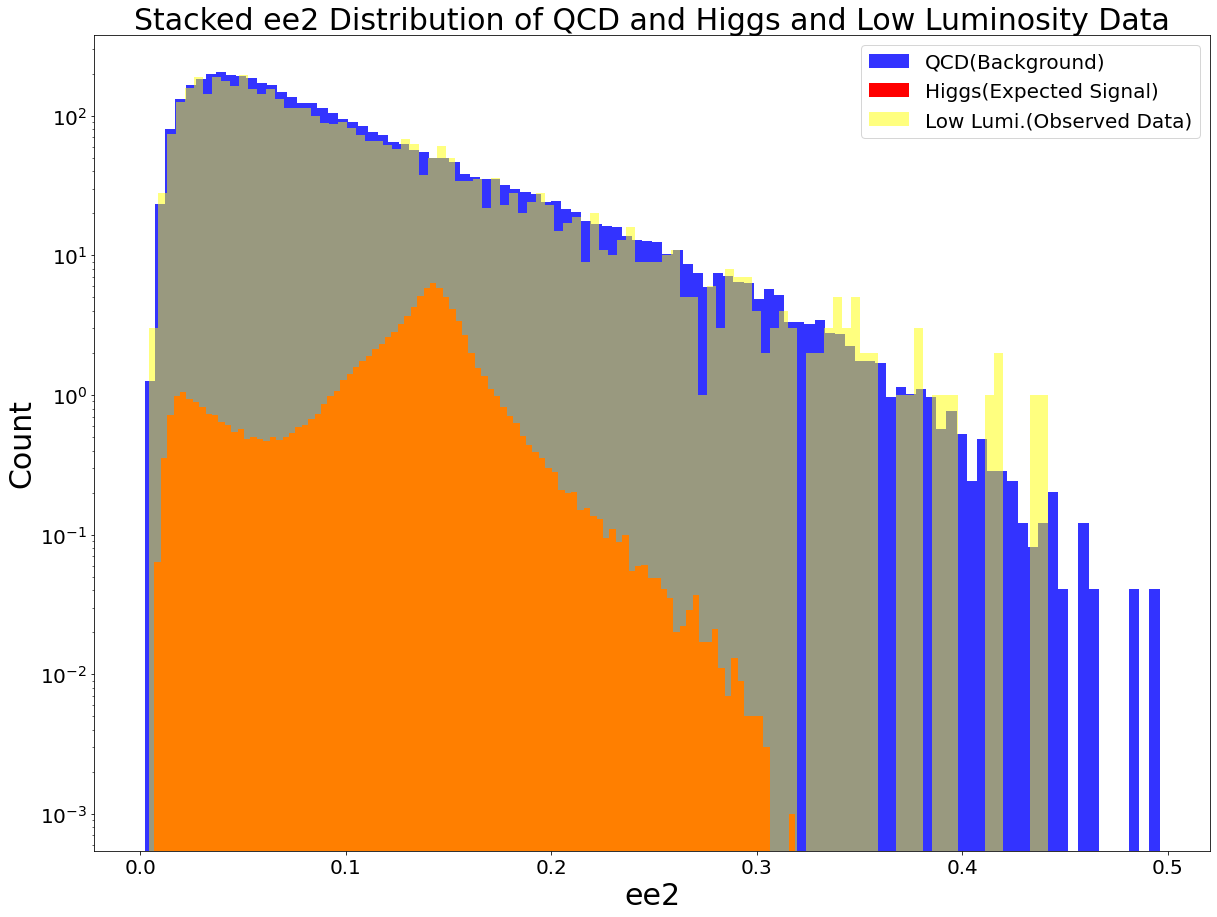

In [172]:
plt.hist(qcd_df['ee2'], bins=100, label = 'QCD(Background)', stacked=True, color='blue', alpha=0.8,weights=np.repeat(4060/len(qcd_df), len(qcd_df))) 
plt.hist(higgs_df['ee2'], bins=100, label = 'Higgs(Expected Signal)', stacked=True, color='red', alpha=1, weights=np.repeat(100/len(higgs_df), len(higgs_df))) 
plt.hist(lowLumi_df['ee2'], bins=100, label= 'Low Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30) 
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('Stacked ee2 Distribution of QCD and Higgs and Low Luminosity Data', fontsize=30)
plt.legend(fontsize=20)
plt.show()

In [176]:
loLu_bkgd_mask2 = (qcd_df['ee2'] >= opt_bottom2) & (qcd_df['ee2'] <= opt_upper2)
loLu_cut_mask2 = (higgs_df['ee2'] >= opt_bottom2) & (higgs_df['ee2'] <= opt_upper2)
loLu_mask2 = (lowLumi_df['ee2'] >= opt_bottom2) & (lowLumi_df['ee2'] <= opt_upper2)

loLu_bkgd2 = qcd_df[loLu_bkgd_mask2]['ee2']
loLu_cut2 = higgs_df[loLu_cut_mask2]['ee2']
loLu_observed2 = lowLumi_df[loLu_mask2]['ee2']

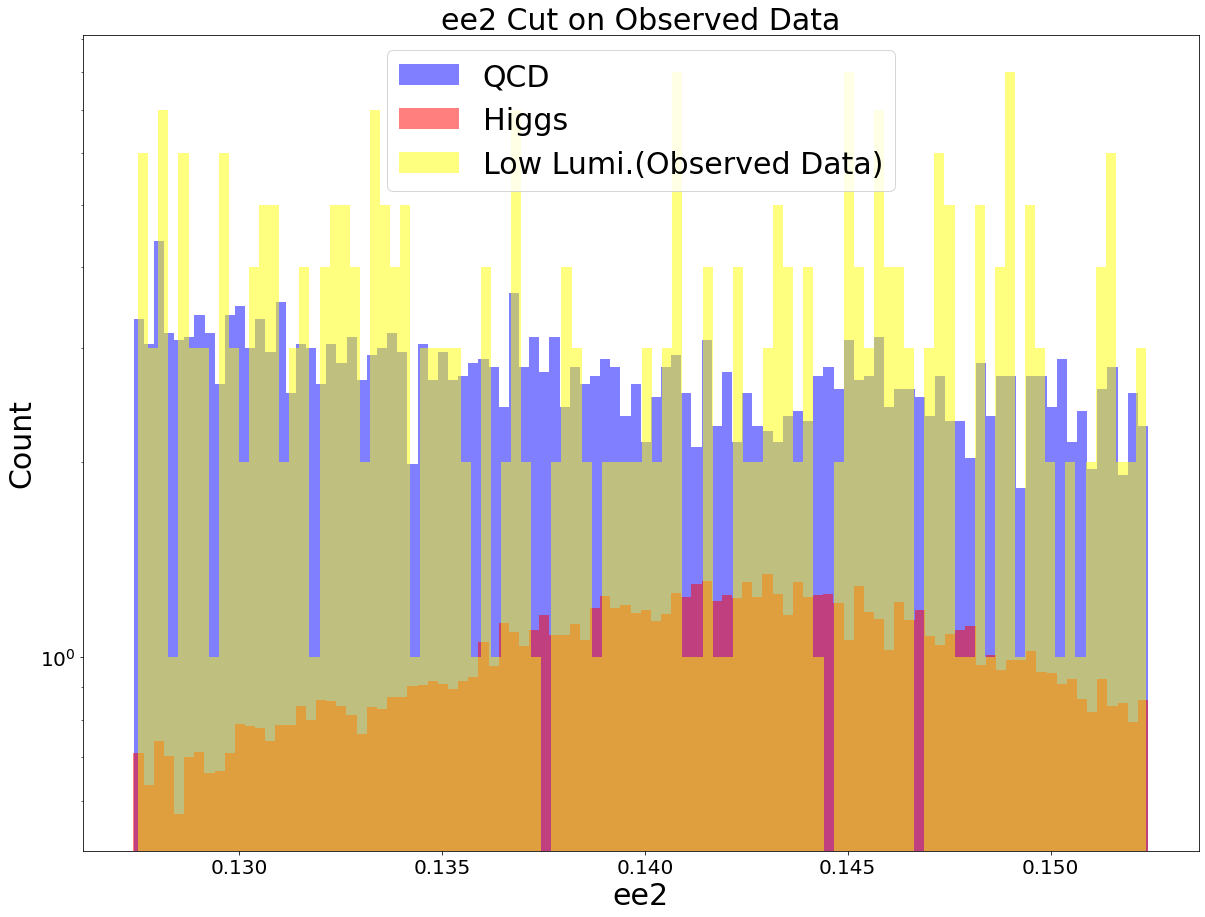

Observed Significance: 5.420238207098566
Expected Significance: 2.7071891781177357


In [178]:
plt.hist(loLu_bkgd2, bins=100, alpha=0.5, color="blue", label='QCD', weights=np.repeat(4060/len(qcd_df), len(loLu_bkgd2)))
plt.hist(loLu_cut2 , bins=100, alpha=0.5, color="red", label='Higgs',weights=np.repeat(100/len(loLu_cut2), len(loLu_cut2)))
l2, temp1, temp2 = plt.hist(loLu_observed2, bins=100, label= 'Low Lumi.(Observed Data)', stacked=True, color='yellow', alpha=0.5)
plt.tick_params(labelsize = 20)
plt.xlabel('ee2', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yscale("log")
plt.title('ee2 Cut on Observed Data', fontsize=30)
plt.legend(fontsize=30)
plt.show()

loLu_obs_cut2 = np.sum(l2)

loLu_prob_cut2 = stats.poisson.cdf(loLu_obs_cut2 + mu_signal, mu=loLu_obs_cut2, loc=0)
loLu_ex_sig_cut2 = stats.norm.ppf(loLu_prob_cut2, loc=0, scale=1)
print("Observed Significance:", loLu_ex_sig_cut2)
print('Expected Significance:', ex_sig_cut7)

For the Low Luminosity data ee2 feature, we see that our observed significance is 5.42 while our expected significance is around 2.70.

### 3. 95% Confidence Level of signal yields

+ In the low luminosity data, the observed significance is less than 5 σ . We will calculate the 95% confidence level upper limit of signal yield.
+ Evaluate the expected 95% confidence level upper limit
+ Evaluate the observed 95% confidence level upper limit
+ Compare expectation to observation. Comment on your finding.

In [180]:
confidence_signal = np.percentile(higgs_df, 95)
print('95% confidence upperbound of the expected signal is:', confidence_signal)
confidence_background = np.percentile(qcd_df, 95)
print('95% confidence upperbound of the expected background is:', confidence_background)
confidence_observed = np.percentile(lowLumi_df, 95)
print('95% confidence upperbound of the observed data is:', confidence_observed)

95% confidence upperbound of the expected signal is: 440.11661977740147
95% confidence upperbound of the expected background is: 430.2609424749776
95% confidence upperbound of the observed data is: 431.04281115017505


The 95% confidence upperbound for the observed Low Luminosity data is only ~1 higher than the expected background and ~9 lower than the expected signal. This tells me that generally the observed data at the 95th percentile is closer to the expected background than the expected signal. Also if I observe a candidate signal (5σ event), and it is too weak to claim a detection, then the true signal would be less than 431.043 (95% confidence upper bound of observed data) 95% of the time.